In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.cluster import DBSCAN, KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.neighbors import NearestNeighbors
import numpy as np
from matplotlib import pyplot as plt



In [2]:
#Read Data in
df=pd.read_csv("merged_train.csv")
df.head(5)

,State,County,FIPS,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural,Democratic,Republican,Party
0,AZ,apache,4001,72346,18.571863,0.486551,5.947806,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076,16298,7810,1
1,AZ,cochise,4003,128177,56.299492,3.714395,34.403208,11.458374,49.069646,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067,17383,26929,0
2,AZ,coconino,4005,138064,54.619597,1.342855,13.711033,4.825298,50.581614,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066,34240,19249,1
3,AZ,gila,4007,53179,63.222325,0.552850,18.548675,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000,7643,12180,0
4,AZ,graham,4009,37529,51.461536,1.811932,32.097844,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399,3368,6870,0


***Task 1***

In [4]:
#Task 1: split the dataset into training and test set using the holdout method

x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,:-3], df.iloc[:,-3:], random_state=1, test_size=0.23)


In [5]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 191 to 1061
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   State                                  920 non-null    object 
 1   County                                 920 non-null    object 
 2   FIPS                                   920 non-null    int64  
 3   Total Population                       920 non-null    int64  
 4   Percent White, not Hispanic or Latino  920 non-null    float64
 5   Percent Black, not Hispanic or Latino  920 non-null    float64
 6   Percent Hispanic or Latino             920 non-null    float64
 7   Percent Foreign Born                   920 non-null    float64
 8   Percent Female                         920 non-null    float64
 9   Percent Age 29 and Under               920 non-null    float64
 10  Percent Age 65 and Older               920 non-null    float64
 11  Med

In [6]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275 entries, 49 to 180
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   State                                  275 non-null    object 
 1   County                                 275 non-null    object 
 2   FIPS                                   275 non-null    int64  
 3   Total Population                       275 non-null    int64  
 4   Percent White, not Hispanic or Latino  275 non-null    float64
 5   Percent Black, not Hispanic or Latino  275 non-null    float64
 6   Percent Hispanic or Latino             275 non-null    float64
 7   Percent Foreign Born                   275 non-null    float64
 8   Percent Female                         275 non-null    float64
 9   Percent Age 29 and Under               275 non-null    float64
 10  Percent Age 65 and Older               275 non-null    float64
 11  Media

***Task 2***

In [7]:
#Task 2: Scaling the x_train and x_test sets
scaler=StandardScaler().fit(x_train.iloc[:,3:])
x_train_scaled=scaler.transform(x_train.iloc[:,3:])
x_test_scaled=scaler.transform(x_test.iloc[:,3:])


***Task 3: Regression models***

In [7]:
#using linear regression with all variables for democratic votes

model=linear_model.LinearRegression().fit(x_train_scaled,y_train['Democratic'])
y_pred=model.predict(x_test_scaled)
r2=metrics.r2_score(y_test['Democratic'],y_pred)
radj=1-(1-r2)*(275-1)/(275-13-1)

print ("Coefficients: \t",model.coef_)
print ("Intercept: \t",model.intercept_)
print ("R-squared: \t",r2)
print("Adjusted R-squared: \t", radj)




Coefficients: 	 [65180.35305484 -3445.88365077  -829.88729492 -7093.73389513
  3103.84879685  -226.64749932 -3658.42000593  -856.54320693
   428.57929225   685.6592625   3574.19800722 -9492.84900608
   568.81147654]
Intercept: 	 26459.871739130427
R-squared: 	 0.9066241634739941
Adjusted R-squared: 	 0.9019732597389823


In [8]:
#using linear regression with all variables for Republican votes

model=linear_model.LinearRegression().fit(x_train_scaled,y_train['Republican'])
y_pred=model.predict(x_test_scaled)
r2=metrics.r2_score(y_test['Republican'],y_pred)
radj=1-(1-r2)*(275-1)/(275-13-1)

print ("Coefficients: \t", model.coef_)
print ("Intercept: \t",model.intercept_)
print ("R-squared: \t",r2)
print("Adjusted R-squared: \t", radj)


Coefficients: 	 [39554.93330223  1936.35120859 -2549.42696013   983.35778642
 -4728.0802429   -628.76439648  -807.93106198  2393.54933962
  5332.70154246  2022.6990234   2935.10256247 -2703.77747028
 -5904.11707453]
Intercept: 	 21058.953260869566
R-squared: 	 0.8204008463950343
Adjusted R-squared: 	 0.8114552946829096


In [9]:
#using lasso Regression with all variables for Democratic votes

model=linear_model.Lasso(alpha=1).fit(x_train_scaled,y_train['Democratic'])
y_pred=model.predict(x_test_scaled)
r2=metrics.r2_score(y_test['Democratic'],y_pred)
radj=1-(1-r2)*(275-1)/(275-13-1)

print ("Coefficients: \t", model.coef_)
print ("Intercept: \t",model.intercept_)
print ("R-squared: \t",r2)
print("Adjusted R-squared: \t", radj)




Coefficients: 	 [65179.58429607 -3432.21060658  -820.69664388 -7080.49766461
  3104.35235033  -226.200928   -3650.7653268   -850.38104973
   428.74654506   685.67904905  3567.34876125 -9487.66345589
   567.2483701 ]
Intercept: 	 26459.871739130427
R-squared: 	 0.9066358324394638
Adjusted R-squared: 	 0.9019855099172914


In [10]:
#using Lasso Regression with all variables for Republican votes

model=linear_model.Lasso(alpha=1).fit(x_train_scaled,y_train['Republican'])
y_pred=model.predict(x_test_scaled)
r2=metrics.r2_score(y_test['Republican'],y_pred)
radj=1-(1-r2)*(275-1)/(275-13-1)

print ("Coefficients: \t", model.coef_)
print ("Intercept: \t",model.intercept_)
print ("R-squared: \t",r2)
print("Adjusted R-squared: \t", radj)


Coefficients: 	 [39551.13609361  1930.04425597 -2549.39478081   976.47849193
 -4719.38496994  -626.34790664  -808.32303017  2389.73750211
  5328.74147455  2020.21972591  2927.89556845 -2698.59094515
 -5901.28777988]
Intercept: 	 21058.953260869566
R-squared: 	 0.82037207773618
Adjusted R-squared: 	 0.8114250931023499


From above, Lasso regression does not seem to be setting any coefficients to 0 which might indicate that all variables are useful in predicting the result. Both linear regression and lasso regression have similar R-squared and adjusted R-squared values. However, We can still experiment with different combinations of variables to see if any is similar or better than using all variables.

In [11]:
#using Lasso regression with Total population,ethnic,education and %rural/urban features for democratic votes

model=linear_model.Lasso(alpha=1).fit(x_train_scaled[:,[0,1,2,3,10,11,12]],y_train['Democratic'])
y_pred=model.predict(x_test_scaled[:,[0,1,2,3,10,11,12]])
r2=metrics.r2_score(y_test['Democratic'],y_pred)
radj=1-(1-r2)*(275-1)/(275-7-1)

print ("Coefficients: \t", model.coef_)
print ("Intercept: \t",model.intercept_)
print ("R-squared: \t",r2)
print("Adjusted R-squared: \t", radj)

Coefficients: 	 [ 66468.36469058  -2835.10254871   -340.50358531  -5893.09326654
   3962.74735093 -10090.03936004   1280.20928827]
Intercept: 	 26459.871739130427
R-squared: 	 0.9077410782516582
Adjusted R-squared: 	 0.9053223050223009


In [13]:
#using Lasso regression with Total population,ethnic,education and %rural/urban fatures for Republican votes

model=linear_model.Lasso(alpha=1).fit(x_train_scaled[:,[0,1,2,3,10,11,12]],y_train['Republican'])
y_pred=model.predict(x_test_scaled[:,[0,1,2,3,10,11,12]])
r2=metrics.r2_score(y_test['Republican'],y_pred)
radj=1-(1-r2)*(275-1)/(275-7-1)

print ("Coefficients: \t", model.coef_)
print ("Intercept: \t",model.intercept_)
print ("R-squared: \t",r2)
print("Adjusted R-squared: \t", radj)

Coefficients: 	 [38416.73437929  3367.89386346 -1646.38789433   268.19841996
   180.58887006 -2912.17794442 -4488.39026087]
Intercept: 	 21058.953260869566
R-squared: 	 0.8040982146474943
Adjusted R-squared: 	 0.79896221278432


In [14]:
#using Lasso regression with Total population,ethnic and age data for democratic votes

model=linear_model.Lasso(alpha=1).fit(x_train_scaled[:,[0,1,2,3,6,7,8]],y_train['Democratic'])
y_pred=model.predict(x_test_scaled[:,[0,1,2,3,6,7,8]])
r2=metrics.r2_score(y_test['Democratic'],y_pred)
radj=1-(1-r2)*(275-1)/(275-7-1)

print ("Coefficients: \t", model.coef_)
print ("Intercept: \t",model.intercept_)
print ("R-squared: \t",r2)
print("Adjusted R-squared: \t", radj)

Coefficients: 	 [ 6.78800747e+04 -5.39046680e+03 -7.68959219e+00 -6.14312062e+03
 -3.92120632e+02  1.94163995e+03  5.19953941e+03]
Intercept: 	 26459.871739130434
R-squared: 	 0.9022677349940688
Adjusted R-squared: 	 0.8997054658740631


In [15]:
#using Lasso regression with Total population,ethnic and age data for Republican votes

model=linear_model.Lasso(alpha=1).fit(x_train_scaled[:,[0,1,2,3,6,7,8]],y_train['Republican'])
y_pred=model.predict(x_test_scaled[:,[0,1,2,3,6,7,8]])
r2=metrics.r2_score(y_test['Republican'],y_pred)
radj=1-(1-r2)*(275-1)/(275-7-1)

print ("Coefficients: \t", model.coef_)
print ("Intercept: \t",model.intercept_)
print ("R-squared: \t",r2)
print("Adjusted R-squared: \t", radj)

Coefficients: 	 [39992.45174544  2189.17010832  -938.00766816   337.82540405
   995.03343305  1506.47451008  5006.53370505]
Intercept: 	 21058.953260869566
R-squared: 	 0.8027955282636687
Adjusted R-squared: 	 0.7976253735739521


In [16]:
#All features except %female, %foreign born and %unemployed
#using Lasso for democratic votes

model=linear_model.Lasso(alpha=1).fit(x_train_scaled[:,[0,1,2,3,6,7,8,10,11,12]],y_train['Democratic'])
y_pred=model.predict(x_test_scaled[:,[0,1,2,3,6,7,8,10,11,12]])
r2=metrics.r2_score(y_test['Democratic'],y_pred)
radj=1-(1-r2)*(275-1)/(275-10-1)

print ("Coefficients: \t", model.coef_)
print ("Intercept: \t",model.intercept_)
print ("R-squared: \t",r2)
print("Adjusted R-squared: \t", radj)

Coefficients: 	 [ 6.60304196e+04 -4.49357971e+03 -1.20217111e+03 -6.56464100e+03
 -4.24321391e+03 -1.11765974e+03  6.21279244e+02  4.79205671e+03
 -1.02998143e+04  1.93350324e+01]
Intercept: 	 26459.871739130427
R-squared: 	 0.9088724499515641
Adjusted R-squared: 	 0.9054206488133658


In [17]:
#All features except %female, %foreign born and %unemployed
#using Lasso for republican votes

model=linear_model.Lasso(alpha=1).fit(x_train_scaled[:,[0,1,2,3,6,7,8,10,11,12]],y_train['Republican'])
y_pred=model.predict(x_test_scaled[:,[0,1,2,3,6,7,8,10,11,12]])
r2=metrics.r2_score(y_test['Republican'],y_pred)
radj=1-(1-r2)*(275-1)/(275-10-1)

print ("Coefficients: \t", model.coef_)
print ("Intercept: \t",model.intercept_)
print ("R-squared: \t",r2)
print("Adjusted R-squared: \t", radj)

Coefficients: 	 [38289.87057722  1918.94147029 -2170.81703375 -1241.08657453
  -851.65073067  2001.10788055  3943.25424507  1761.99202865
 -1144.30127907 -5694.18878151]
Intercept: 	 21058.953260869566
R-squared: 	 0.8025381328054344
Adjusted R-squared: 	 0.7950585166238221


From our results, we can see that using all variables is consistently better than using various subsets, especially for predicting republican votes. i.e all variables are playing an important role in the final vote tally. When using all variables, Lasso and Linear Regression have similar scores, however, it would still be advisable to go with Lasso Regression to lower the coefficients and ensure it generalizes better.

***Task 4: Classification models***

In [18]:
# Classification model #1: K-NN
print("Model: K-Nearest Neighbors")
num_neighbors = [3,4,5]

# create models for each number of nearest neighbors
for n in num_neighbors:
    classifier = KNeighborsClassifier(n_neighbors=n)  
    classifier.fit(x_train_scaled, y_train['Party'])

    y_pred = classifier.predict(x_test_scaled)

    accuracy = metrics.accuracy_score(y_test['Party'], y_pred)
    error = 1 - accuracy
    precision = metrics.precision_score(y_test['Party'], y_pred, average = None)
    recall = metrics.recall_score(y_test['Party'], y_pred, average = None)
    F1_score = (2 * recall * precision) / (recall + precision)
    print("Number of neighbors: ", n, " ------------")
    print('Accuracy: \t', round(accuracy,3))
    print('Precision: \t', precision)
    print('Recall: \t', recall)
    print('F1 Score: \t', F1_score)

print('\nBest K-NN model: nn = 4')

Model: K-Nearest Neighbors
Number of neighbors:  3  ------------
Accuracy: 	 0.782
Precision: 	 [0.81278539 0.66071429]
Recall: 	 [0.9035533  0.47435897]
F1 Score: 	 [0.85576923 0.55223881]
Number of neighbors:  4  ------------
Accuracy: 	 0.796
Precision: 	 [0.80257511 0.76190476]
Recall: 	 [0.94923858 0.41025641]
F1 Score: 	 [0.86976744 0.53333333]
Number of neighbors:  5  ------------
Accuracy: 	 0.785
Precision: 	 [0.81944444 0.66101695]
Recall: 	 [0.89847716 0.5       ]
F1 Score: 	 [0.85714286 0.56934307]

Best K-NN model: nn = 4


In [19]:
# Classification model #2: Naive Bayes
print("Model: Naive Bayes")

classifier = GaussianNB()  
classifier.fit(x_train_scaled, y_train['Party'])

y_pred = classifier.predict(x_test_scaled)

accuracy = metrics.accuracy_score(y_test['Party'], y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_test['Party'], y_pred, average = None)
recall = metrics.recall_score(y_test['Party'], y_pred, average = None)
F1_score = (2 * recall * precision) / (recall + precision)
print('Accuracy: \t', round(accuracy,3))
print('Precision: \t', precision)
print('Recall: \t', recall)
print('F1 Score: \t', F1_score)

Model: Naive Bayes
Accuracy: 	 0.753
Precision: 	 [0.79723502 0.5862069 ]
Recall: 	 [0.87817259 0.43589744]
F1 Score: 	 [0.83574879 0.5       ]


In [19]:
# Classification model #3: SVM
print("Model: Support Vector Machines")
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for k in kernels:
    print("Kernel: ", k)
    classifier = SVC(kernel=k)  
    classifier.fit(x_train_scaled, y_train['Party'])

    y_pred = classifier.predict(x_test_scaled)

    accuracy = metrics.accuracy_score(y_test['Party'], y_pred)
    error = 1 - accuracy
    precision = metrics.precision_score(y_test['Party'], y_pred, average = None)
    recall = metrics.recall_score(y_test['Party'], y_pred, average = None)
    F1_score = (2 * recall * precision) / (recall + precision)
    print('Accuracy: \t', round(accuracy,3))
    print('Precision: \t', precision)
    print('Recall: \t', recall)
    print('F1 Score: \t', F1_score)
    
print('\nBest SVM model: rbf')

Model: Support Vector Machines
Kernel:  linear
Accuracy: 	 0.789
Precision: 	 [0.79079498 0.77777778]
Recall: 	 [0.95939086 0.35897436]
F1 Score: 	 [0.86697248 0.49122807]
Kernel:  poly
Accuracy: 	 0.778
Precision: 	 [0.77868852 0.77419355]
Recall: 	 [0.96446701 0.30769231]
F1 Score: 	 [0.861678   0.44036697]
Kernel:  rbf
Accuracy: 	 0.815
Precision: 	 [0.8173913 0.8      ]
Recall: 	 [0.95431472 0.46153846]
F1 Score: 	 [0.88056206 0.58536585]
Kernel:  sigmoid
Accuracy: 	 0.662
Precision: 	 [0.73853211 0.36842105]
Recall: 	 [0.81725888 0.26923077]
F1 Score: 	 [0.77590361 0.31111111]

Best SVM model: rbf


In [20]:
# Metrics without feature selection:
                Accuracy    Precision        Recall         F1 Score
KNN - 3         0.782       [0.813 0.661]   [0.904 0.474]   [0.856 0.552]
KNN - 4         0.796       [0.803 0.762]   [0.949 0.410]   [0.870 0.533]
KNN - 5         0.785       [0.797 0.586]   [0.878 0.436]   [0.836 0.5  ]
NB              0.753       [0.797 0.586]   [0.878 0.436]   [0.836 0.5  ]
SVM - linear    0.789       [0.791 0.778]   [0.959 0.359]   [0.867 0.491]
SVM - poly      0.778       [0.779 0.774]   [0.964 0.308]   [0.862 0.440]
SVM - rbf       0.815       [0.817 0.8  ]   [0.954 0.462]   [0.881 0.585]
SVM - sigmoid   0.662       [0.739 0.368]   [0.817 0.269]   [0.776 0.311]

IndentationError: unexpected indent (<ipython-input-20-3a000b712c15>, line 2)

In [14]:
 # K-Nearest Neighbors using feature selection
x_train_1 = x_train.iloc[:,[3,4,5,6,7]] # Total population, all racial percentages
x_test_1 = x_test.iloc[:,[3,4,5,6,7]]

x_train_2 = x_train.iloc[:,[3,9,10]] # Total population, age
x_test_2 = x_test.iloc[:,[3,9,10]]

x_train_3 = x_train.iloc[:,[3,11,12]] # Total population, income
x_test_3 = x_test.iloc[:,[3,11,12]]

x_train_4 = x_train.iloc[:,[3,13,14]] # Total population, education
x_test_4 = x_test.iloc[:,[3,13,14]]

train_sets = [x_train_1, x_train_2, x_train_3, x_train_4]
test_sets = [x_test_1, x_test_2, x_test_3, x_test_4]

train_sets_scaled = []
test_sets_scaled = []

# scale each pair of training and test sets
for i in range(len(train_sets)):
    scaler = StandardScaler().fit(train_sets[i])
    train_sets_scaled.append(scaler.transform(train_sets[i]))
    test_sets_scaled.append(scaler.transform(test_sets[i]))

[[-0.31541432  0.66815816 -0.51942279 -0.59253906 -0.63073271]
 [-0.23232426  0.88394474 -0.51890209 -0.58220293 -0.69077485]
 [-0.38442597 -3.09710523 -0.47414247  4.48157983  5.30924274]
 ...
 [-0.30888728  0.78841907 -0.54277074 -0.49469377 -0.43103556]
 [ 0.21431212 -0.48232738  1.35263    -0.13653801 -0.4547251 ]
 [-0.3883297   0.66705871 -0.5974583  -0.45766177 -0.61876255]]


In [15]:
# Classification model #1: K-NN
print("Model: K-Nearest Neighbors")
num_neighbors = [3,4,5]

# create models for each number of nearest neighbors
for n in num_neighbors:
    # create models for each combination of features
    for s in range(len(train_sets_scaled)):
        classifier = KNeighborsClassifier(n_neighbors=n)  
        classifier.fit(train_sets_scaled[s], y_train['Party'])

        y_pred = classifier.predict(test_sets_scaled[s])

        accuracy = metrics.accuracy_score(y_test['Party'], y_pred)
        error = 1 - accuracy
        precision = metrics.precision_score(y_test['Party'], y_pred, average = None)
        recall = metrics.recall_score(y_test['Party'], y_pred, average = None)
        F1_score = (2 * recall * precision) / (recall + precision)
        print("Number of neighbors: ", n, " ------------")
        print("Test set: #", s, " ------------")
        print('Accuracy: \t', round(accuracy,3))
        print('Precision: \t', precision)
        print('Recall: \t', recall)
        print('F1 Score: \t', F1_score)

Model: K-Nearest Neighbors
Number of neighbors:  3  ------------
Train set: # 0  ------------
Accuracy: 	 0.804
Precision: 	 [0.8206278  0.73076923]
Recall: 	 [0.92893401 0.48717949]
F1 Score: 	 [0.87142857 0.58461538]
Number of neighbors:  3  ------------
Train set: # 1  ------------
Accuracy: 	 0.702
Precision: 	 [0.75784753 0.46153846]
Recall: 	 [0.85786802 0.30769231]
F1 Score: 	 [0.8047619  0.36923077]
Number of neighbors:  3  ------------
Train set: # 2  ------------
Accuracy: 	 0.727
Precision: 	 [0.75847458 0.53846154]
Recall: 	 [0.90862944 0.26923077]
F1 Score: 	 [0.82678984 0.35897436]
Number of neighbors:  3  ------------
Train set: # 3  ------------
Accuracy: 	 0.716
Precision: 	 [0.76681614 0.5       ]
Recall: 	 [0.8680203  0.33333333]
F1 Score: 	 [0.81428571 0.4       ]
Number of neighbors:  4  ------------
Train set: # 0  ------------
Accuracy: 	 0.796
Precision: 	 [0.79497908 0.80555556]
Recall: 	 [0.96446701 0.37179487]
F1 Score: 	 [0.87155963 0.50877193]
Number of nei

In [ ]:
# K-Nearest Neighbor Classification WITH feature selection
                Accuracy    Precision      Recall         F1 Score
KNN - 3, 0      0.804       [0.821 0.731]  [0.929 0.487]  [0.871 0.585]
KNN - 3, 1      0.702       [0.758 0.462]  [0.858 0.308]  [0.805 0.369]
KNN - 3, 2      0.727       [0.758 0.538]  [0.909 0.269]  [0.827 0.359]
KNN - 3, 3      0.716       [0.767 0.5  ]  [0.868 0.333]  [0.814 0.4  ]

KNN - 4, 0      0.796       [0.795 0.806]  [0.964 0.372]  [0.872 0.509]
KNN - 4, 1      0.753       [0.759 0.692]  [0.959 0.231]  [0.848 0.346]
KNN - 4, 2      0.749       [0.752 0.714]  [0.970 0.192]  [0.847 0.303]
KNN - 4, 3      0.742       [0.760 0.606]  [0.934 0.256]  [0.838 0.360]

KNN - 5, 0      0.818       [0.821 0.804]  [0.954 0.474]  [0.883 0.597]
KNN - 5, 1      0.727       [0.763 0.535]  [0.898 0.295]  [0.825 0.380]
KNN - 5, 2      0.753       [0.770 0.639]  [0.934 0.295]  [0.844 0.404]
KNN - 5, 3      0.753       [0.782 0.609]  [0.909 0.359]  [0.840 0.452]

Best combination: nn: 5, set: 0

In [16]:
# Classification model #2: Naive Bayes
print("Model: Naive Bayes")

classifier = GaussianNB()

for s in range(len(train_sets_scaled)):
    classifier.fit(train_sets_scaled[s], y_train['Party'])
    y_pred = classifier.predict(test_sets_scaled[s])

    accuracy = metrics.accuracy_score(y_test['Party'], y_pred)
    error = 1 - accuracy
    precision = metrics.precision_score(y_test['Party'], y_pred, average = None)
    recall = metrics.recall_score(y_test['Party'], y_pred, average = None)
    F1_score = (2 * recall * precision) / (recall + precision)
    print('Test set #', s)
    print('Accuracy: \t', round(accuracy,3))
    print('Precision: \t', precision)
    print('Recall: \t', recall)
    print('F1 Score: \t', F1_score)

Model: Naive Bayes
Test set # 0
Accuracy: 	 0.753
Precision: 	 [0.78666667 0.6       ]
Recall: 	 [0.89847716 0.38461538]
F1 Score: 	 [0.83886256 0.46875   ]
Test set # 1
Accuracy: 	 0.767
Precision: 	 [0.76923077 0.75      ]
Recall: 	 [0.96446701 0.26923077]
F1 Score: 	 [0.85585586 0.39622642]
Test set # 2
Accuracy: 	 0.753
Precision: 	 [0.7611336  0.67857143]
Recall: 	 [0.95431472 0.24358974]
F1 Score: 	 [0.84684685 0.35849057]
Test set # 3
Accuracy: 	 0.756
Precision: 	 [0.77310924 0.64864865]
Recall: 	 [0.93401015 0.30769231]
F1 Score: 	 [0.84597701 0.4173913 ]


In [ ]:
# Naive Bayes Classification WITH feature selection
        Accuracy    Precision       Recall          F1 Score
Set 0   0.753       [0.787 0.6  ]   [0.898 0.385]   [0.839 0.469]
Set 1   0.767       [0.769 0.75 ]   [0.964 0.269]   [0.856 0.396]
Set 2   0.753       [0.761 0.679]   [0.954 0.244]   [0.847 0.358]
Set 3   0.756       [0.773 0.649]   [0.934 0.308]   [0.846 0.417]

Best set: 1 (or 0)

In [17]:
# Classification model #3: SVM
print("Model: Support Vector Machines")
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for k in kernels:
    for s in range(len(train_sets_scaled)):
        print("Kernel: ", k)
        print("Test set #", s)
        classifier = SVC(kernel=k)  
        classifier.fit(train_sets_scaled[s], y_train['Party'])

        y_pred = classifier.predict(test_sets_scaled[s])

        accuracy = metrics.accuracy_score(y_test['Party'], y_pred)
        error = 1 - accuracy
        precision = metrics.precision_score(y_test['Party'], y_pred, average = None)
        recall = metrics.recall_score(y_test['Party'], y_pred, average = None)
        F1_score = (2 * recall * precision) / (recall + precision)
        print('Accuracy: \t', round(accuracy,3))
        print('Precision: \t', precision)
        print('Recall: \t', recall)
        print('F1 Score: \t', F1_score)

Model: Support Vector Machines
Kernel:  linear
Test set # 0
Accuracy: 	 0.764
Precision: 	 [0.75984252 0.80952381]
Recall: 	 [0.97969543 0.21794872]
F1 Score: 	 [0.85587583 0.34343434]
Kernel:  linear
Test set # 1
Accuracy: 	 0.753
Precision: 	 [0.74712644 0.85714286]
Recall: 	 [0.98984772 0.15384615]
F1 Score: 	 [0.85152838 0.26086957]
Kernel:  linear
Test set # 2
Accuracy: 	 0.749
Precision: 	 [0.74427481 0.84615385]
Recall: 	 [0.98984772 0.14102564]
F1 Score: 	 [0.8496732  0.24175824]
Kernel:  linear
Test set # 3
Accuracy: 	 0.753
Precision: 	 [0.7611336  0.67857143]
Recall: 	 [0.95431472 0.24358974]
F1 Score: 	 [0.84684685 0.35849057]
Kernel:  poly
Test set # 0
Accuracy: 	 0.796
Precision: 	 [0.78313253 0.92307692]
Recall: 	 [0.98984772 0.30769231]
F1 Score: 	 [0.87443946 0.46153846]
Kernel:  poly
Test set # 1
Accuracy: 	 0.731
Precision: 	 [0.73033708 0.75      ]
Recall: 	 [0.98984772 0.07692308]
F1 Score: 	 [0.84051724 0.13953488]
Kernel:  poly
Test set # 2
Accuracy: 	 0.753
Prec

In [ ]:
# SVM Classification WITH feature selection
            Accuracy    Precision       Recall          F1 Score
linear, 0   0.764       [0.760 0.810]   [0.980 0.218]   [0.856 0.343]
linear, 1   0.753       [0.747 0.857]   [0.990 0.154]   [0.852 0.261]
linear, 2   0.749       [0.744 0.846]   [0.990 0.141]   [0.850 0.242]
linear, 3   0.753       [0.761 0.679]   [0.954 0.244]   [0.847 0.358]

poly, 0     0.796       [0.783 0.923]   [0.990 0.308]   [0.874 0.462]
poly, 1     0.731       [0.730 0.75 ]   [0.990 0.077]   [0.841 0.140]
poly, 2     0.753       [0.745 0.917]   [0.995 0.141]   [0.852 0.244]
poly, 3     0.735       [0.737 0.692]   [0.980 0.115]   [0.841 0.198]

rbf, 0      0.818       [0.810 0.868]   [0.975 0.423]   [0.885 0.569]
rbf, 1      0.76        [0.765 0.714]   [0.959 0.256]   [0.851 0.377]
rbf, 2      0.753       [0.753 0.75 ]   [0.975 0.192]   [0.850 0.306]
rbf, 3      0.749       [0.762 0.645]   [0.944 0.256]   [0.844 0.367]

sigmoid, 0  0.695       [0.776 0.457]   [0.807 0.410]   [0.791 0.432]
sigmoid, 1  0.709       [0.772 0.483]   [0.843 0.372]   [0.806 0.420]
sigmoid, 2  0.68        [0.747 0.407]   [0.838 0.282]   [0.789 0.333]
sigmoid, 3  0.727       [0.799 0.521]   [0.827 0.474]   [0.813 0.497]

Best combination: kernel: rbf, set: 0

In [ ]:
# Final analysis
                Accuracy    Precision       Recall          F1 Score
KNN - 5, 0      0.818       [0.821 0.804]   [0.954 0.474]   [0.883 0.597]
NB - Set 0      0.753       [0.787 0.6  ]   [0.898 0.385]   [0.839 0.469]
NB - Set 1      0.767       [0.769 0.75 ]   [0.964 0.269]   [0.856 0.396]
SVM - rbf, 0    0.818       [0.810 0.868]   [0.975 0.423]   [0.885 0.569]
SVM - rbf, all  0.815       [0.817 0.8  ]   [0.954 0.462]   [0.881 0.585]

Overall best: KNN, nn: 5, set: 0


**Task 4 Analysis:**
*Best model:* The model that gave us the best results was the KNN model with 5 nearest neighbors using set 0 ('Total population' and all features related to racial diversity), although it performed very similarly to the SVM model that used the 'rbf' kernel and set 0. To select the parameters of the models, we chose 3 different numbers of nearest neighbors for the K-NN model and all the possible kernels (except for 'precomputed') for the SVM model. In terms of features, we created 4 different combinations of features. While every set had "Total Population" as a feature, the first set (set 0) had all features relating to the racial diversity of each county. Sets 1, 2, and 3 contained features related to age, income, and education respectively. 

***Task 5: Clustering models***

In [247]:
# Task 5
#Partiion data set into True Clusters and Attributes
x = df.iloc[:,2:-2]
x.head()

scaler = StandardScaler()  # scale
scaler.fit(x)
x_scaled = scaler.transform(x)

feature_set = ["All features", "Total population,ethnic,education and %rural/urban features", "Total population, ethnic and age data", "All features except %female, %foreign born and %unemployed"]

x_1 = df.iloc[:,[3,10,11,12]] #Total population,ethnic,education and %rural/urban features
x_2 = df.iloc[:,[3,6,7,8]] #Total population, ethnic and age data
x_3 = df.iloc[:,[3,6,7,8,10,11,12]] #All features except %female, %foreign born and %unemployed

y = df["Party"] 

DBSCAN 5 Minimum samples

Unsupervised Metrics
Adjusted Random Index:	 0.17838248594018535 

All features
Silhouette Coefficient:	 0.11757915833565608 

Total population,ethnic,education and %rural/urban features
Silhouette Coefficient:	 0.11985047205188716 

Total population, ethnic and age data
Silhouette Coefficient:	 0.13067358455053382 

All features except %female, %foreign born and %unemployed
Silhouette Coefficient:	 0.11985043796071204 



[Text(0.5, 1.0, 'County party data'),
 Text(0.5, 0, 'Democratic'),
 Text(0, 0.5, 'Republican')]

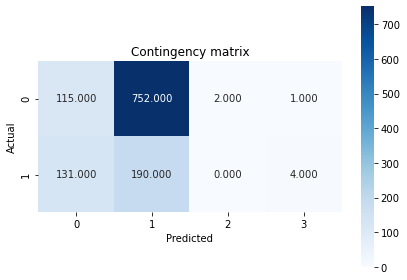

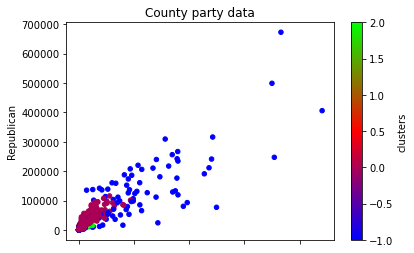

In [248]:
#DBSCAN 5 min Samples
clustering = DBSCAN(eps = 2, min_samples = 5, metric = "euclidean").fit(x_scaled)
clusters = clustering.labels_
df["clusters"] = pd.Series(clusters) #update data frame

#Unsupervised metrics
print("DBSCAN 5 Minimum samples\n")
print("Unsupervised Metrics")
adjusted_rand_index = metrics.adjusted_rand_score(y, clusters)
print("Adjusted Random Index:\t",adjusted_rand_index, "\n")
num = 0
for f in [x, x_1, x_2, x_3]: #different feature sets
    silhouette_coefficient = metrics.silhouette_score(f, clusters, metric = "euclidean")
    print(feature_set[num])
    print("Silhouette Coefficient:\t", silhouette_coefficient, "\n")
    num += 1

#Supervised metrics
cont_matrix = metrics.cluster.contingency_matrix(y, clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

ax = df.plot(kind = 'scatter', x = 'Democratic', y = 'Republican', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'County party data', xlabel = 'Democratic', ylabel = 'Republican')

DBSCAN 10 Minimum samples

Unsupervised Metrics
Adjusted Random Index:	 0.15616347654499968 

All features
Silhouette Coefficient:	 0.42496567175991207 

Total population,ethnic,education and %rural/urban features
Silhouette Coefficient:	 0.42999296696252887 

Total population, ethnic and age data
Silhouette Coefficient:	 0.4329584312987028 

All features except %female, %foreign born and %unemployed
Silhouette Coefficient:	 0.4299929689977308 



[Text(0.5, 1.0, 'County party data'),
 Text(0.5, 0, 'Democratic'),
 Text(0, 0.5, 'Republican')]

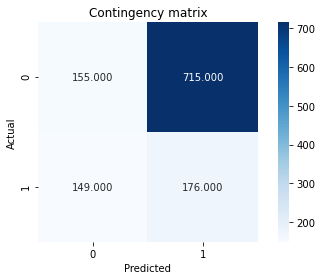

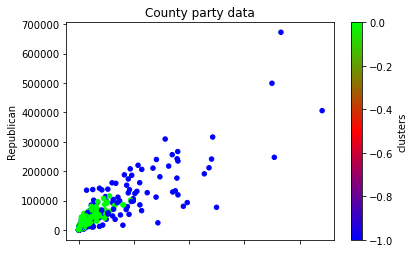

In [249]:
#DBSCAN 10 min Samples
clustering = DBSCAN(eps = 2, min_samples = 10, metric = "euclidean").fit(x_scaled)
clusters = clustering.labels_
df["clusters"] = pd.Series(clusters) #update data frame

#Unsupervised metrics
print("DBSCAN 10 Minimum samples\n")
print("Unsupervised Metrics")
adjusted_rand_index = metrics.adjusted_rand_score(y, clusters)
print("Adjusted Random Index:\t",adjusted_rand_index, "\n")
num = 0
for f in [x, x_1, x_2, x_3]: #different feature sets
    silhouette_coefficient = metrics.silhouette_score(f, clusters, metric = "euclidean")
    print(feature_set[num])
    print("Silhouette Coefficient:\t", silhouette_coefficient, "\n")
    num += 1

#Supervised metrics
cont_matrix = metrics.cluster.contingency_matrix(y, clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

ax = df.plot(kind = 'scatter', x = 'Democratic', y = 'Republican', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'County party data', xlabel = 'Democratic', ylabel = 'Republican')

Random Initilization 10 iteration and 2 clusters

Unsupervised Metrics
Adjusted Random Index:	 0.2222399364746049 

All features
Silhouette Coefficient:	 0.531920226272818 

Total population,ethnic,education and %rural/urban features
Silhouette Coefficient:	 0.5401956732528918 

Total population, ethnic and age data
Silhouette Coefficient:	 0.5451716363041155 

All features except %female, %foreign born and %unemployed
Silhouette Coefficient:	 0.5401956847578013 



[Text(0.5, 1.0, 'County party data'),
 Text(0.5, 0, 'Democratic'),
 Text(0, 0.5, 'Republican')]

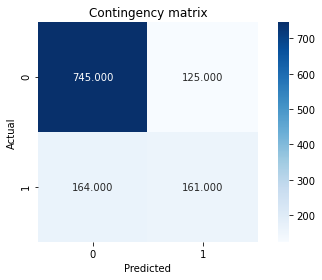

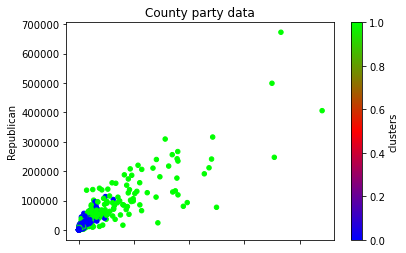

In [250]:
#Various Feature sets 
#KMeans clustering 1 iteration, 2n clusters, random initialization
 #Show Clusters
clustering = KMeans(n_clusters = 2, n_init = 10, random_state = 0, init = 'random' ).fit(x_scaled)
clusters = clustering.labels_
df["clusters"] = pd.Series(clusters) #update data frame

#Unsupervised metrics
print("Random Initilization 10 iteration and 2 clusters\n")
print("Unsupervised Metrics")
adjusted_rand_index = metrics.adjusted_rand_score(y, clusters)
print("Adjusted Random Index:\t",adjusted_rand_index, "\n")
num = 0
for f in [x, x_1, x_2, x_3]: #different feature sets
    silhouette_coefficient = metrics.silhouette_score(f, clusters, metric = "euclidean")
    print(feature_set[num])
    print("Silhouette Coefficient:\t", silhouette_coefficient, "\n")
    num += 1

#Supervised metrics
cont_matrix = metrics.cluster.contingency_matrix(y, clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

ax = df.plot(kind = 'scatter', x = 'Democratic', y = 'Republican', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'County party data', xlabel = 'Democratic', ylabel = 'Republican')

K-Means++ Initilization 10 iteration and 2 clusters

Unsupervised Metrics
Adjusted Random Index:	 0.21950742860622852 

All features
Silhouette Coefficient:	 0.5362353605211608 

Total population,ethnic,education and %rural/urban features
Silhouette Coefficient:	 0.5444652844065617 

Total population, ethnic and age data
Silhouette Coefficient:	 0.549597637844138 

All features except %female, %foreign born and %unemployed
Silhouette Coefficient:	 0.5444652958417578 



[Text(0.5, 1.0, 'County party data'),
 Text(0.5, 0, 'Democratic'),
 Text(0, 0.5, 'Republican')]

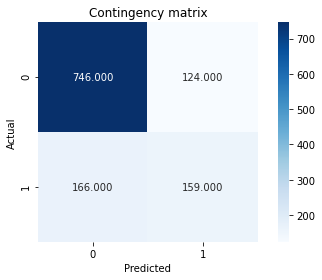

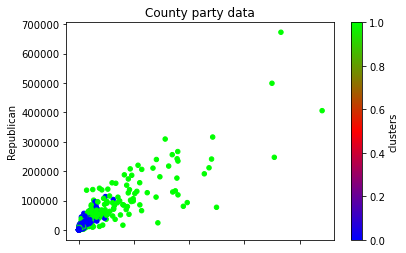

In [251]:
#KMeans clustering 10 iterations, 2n clusters, k-means++ initialization
 #Show Clusters
clustering = KMeans(n_clusters = 2, n_init = 10, random_state = 0, init = 'k-means++' ).fit(x_scaled)
clusters = clustering.labels_
df["clusters"] = pd.Series(clusters) #update data frame

#Unsupervised metrics
print("K-Means++ Initilization 10 iteration and 2 clusters\n")
print("Unsupervised Metrics")
adjusted_rand_index = metrics.adjusted_rand_score(y, clusters)
print("Adjusted Random Index:\t",adjusted_rand_index, "\n")
num = 0
for f in [x, x_1, x_2, x_3]: #different feature sets
    silhouette_coefficient = metrics.silhouette_score(f, clusters, metric = "euclidean")
    print(feature_set[num])
    print("Silhouette Coefficient:\t", silhouette_coefficient, "\n")
    num += 1

#Supervised metrics
cont_matrix = metrics.cluster.contingency_matrix(y, clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

ax = df.plot(kind = 'scatter', x = 'Democratic', y = 'Republican', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'County party data', xlabel = 'Democratic', ylabel = 'Republican')

Random Initilization 50 iterations and 2 clusters

Unsupervised Metrics
Adjusted Random Index:	 0.2222399364746049 

All features
Silhouette Coefficient:	 0.531920226272818 

Total population,ethnic,education and %rural/urban features
Silhouette Coefficient:	 0.5401956732528918 

Total population, ethnic and age data
Silhouette Coefficient:	 0.5451716363041155 

All features except %female, %foreign born and %unemployed
Silhouette Coefficient:	 0.5401956847578013 



[Text(0.5, 1.0, 'County party data'),
 Text(0.5, 0, 'Democratic'),
 Text(0, 0.5, 'Republican')]

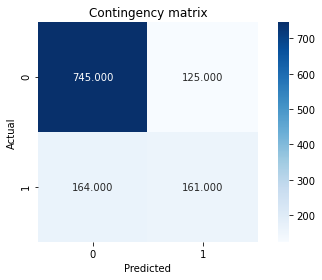

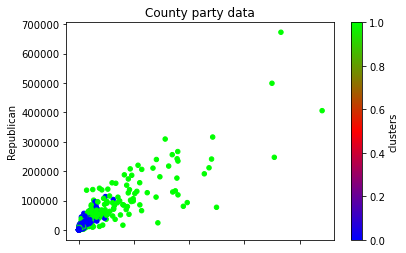

In [252]:
#KMeans clustering 50 iterations, 2n clusters, random initialization
 #Show Clusters
clustering = KMeans(n_clusters = 2, n_init = 50, random_state = 1, init = 'random' ).fit(x_scaled)
clusters = clustering.labels_
df["clusters"] = pd.Series(clusters) #update data frame

#Unsupervised metrics
print("Random Initilization 50 iterations and 2 clusters\n")
print("Unsupervised Metrics")
adjusted_rand_index = metrics.adjusted_rand_score(y, clusters)
print("Adjusted Random Index:\t",adjusted_rand_index, "\n")
num = 0
for f in [x, x_1, x_2, x_3]: #different feature sets
    silhouette_coefficient = metrics.silhouette_score(f, clusters, metric = "euclidean")
    print(feature_set[num])
    print("Silhouette Coefficient:\t", silhouette_coefficient, "\n")
    num += 1

#Supervised metrics
cont_matrix = metrics.cluster.contingency_matrix(y, clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

ax = df.plot(kind = 'scatter', x = 'Democratic', y = 'Republican', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'County party data', xlabel = 'Democratic', ylabel = 'Republican')

K-Means++ Initilization 50 iteration and 2 clusters

Unsupervised Metrics
Adjusted Random Index:	 0.2222399364746049 

All features
Silhouette Coefficient:	 0.531920226272818 

Total population,ethnic,education and %rural/urban features
Silhouette Coefficient:	 0.5401956732528918 

Total population, ethnic and age data
Silhouette Coefficient:	 0.5451716363041155 

All features except %female, %foreign born and %unemployed
Silhouette Coefficient:	 0.5401956847578013 



[Text(0.5, 1.0, 'County party data'),
 Text(0.5, 0, 'Democratic'),
 Text(0, 0.5, 'Republican')]

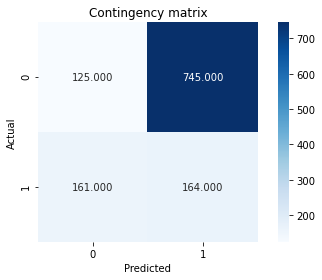

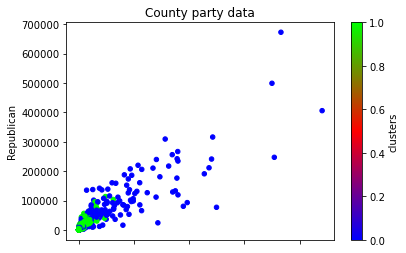

In [253]:
#KMeans clustering 50 iterations, 2n clusters, k-means++ initialization
 #Show Clusters
clustering = KMeans(n_clusters = 2, n_init = 50, random_state = 1, init = 'k-means++' ).fit(x_scaled)
clusters = clustering.labels_
df["clusters"] = pd.Series(clusters) #update data frame

#Unsupervised metrics
print("K-Means++ Initilization 50 iteration and 2 clusters\n")
print("Unsupervised Metrics")
adjusted_rand_index = metrics.adjusted_rand_score(y, clusters)
print("Adjusted Random Index:\t",adjusted_rand_index, "\n")
num = 0
for f in [x, x_1, x_2, x_3]: #different feature sets
    silhouette_coefficient = metrics.silhouette_score(f, clusters, metric = "euclidean")
    print(feature_set[num])
    print("Silhouette Coefficient:\t", silhouette_coefficient, "\n")
    num += 1

#Supervised metrics
cont_matrix = metrics.cluster.contingency_matrix(y, clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

ax = df.plot(kind = 'scatter', x = 'Democratic', y = 'Republican', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'County party data', xlabel = 'Democratic', ylabel = 'Republican')

***Task 6: Map***

In [254]:
#Task 6

***Task 7: Prediction***

In [ ]:
# Task 7